In [3]:
import geopandas as gpd 
import pandas as pd

In [137]:
df_Myyrmanni=pd.read_csv("data/TravelTimes_to_5902043_Myyrmanni.txt", sep=";")
df_itis= pd.read_csv("data/TravelTimes_to_5944003_Itis.txt",sep=";")
df_itis= gpd.GeoDataFrame(df_itis)
df_Myyrmanni=gpd.GeoDataFrame(df)
df_itis.columns

Index(['from_id', 'to_id', 'walk_t', 'walk_d', 'car_r_t', 'car_r_d', 'car_m_t',
       'car_m_d', 'pt_r_t', 'pt_r_tt', 'pt_r_d', 'pt_m_t', 'pt_m_tt',
       'pt_m_d'],
      dtype='object')

In [138]:
df_Myyrmanni=df_Myyrmanni[["to_id", "car_r_t", "from_id", "to_id","pt_r_t"]]
#df_itis=df_itis[["to_id", "car_r_t", "from_id", "pt_r_t", "car_r_d'"]]
df_itis.head()

,from_id,to_id,walk_t,walk_d,car_r_t,car_r_d,car_m_t,car_m_d,pt_r_t,pt_r_tt,pt_r_d,pt_m_t,pt_m_tt,pt_m_d
0,5785640,5944003,494,34582,50,36229,44,36229,132,157,38465,142,173,38465
1,5785641,5944003,457,31966,51,36439,45,36439,135,154,38671,145,171,38671
2,5785642,5944003,458,32046,58,35841,52,34064,137,154,38789,147,172,38789
3,5785643,5944003,462,32338,57,37723,50,37935,141,163,39082,151,176,39082
4,5787544,5944003,487,34093,50,35803,44,35803,125,142,37976,122,148,37786


In [139]:
fp = "data/MetropAccess_YKR_grid_EurefFIN.shp"

# Read the GeoJSON file similarly as Shapefile
grid= gpd.read_file(fp)
grid["from_id"]=grid["YKR_ID"]
grid=grid.drop("YKR_ID", axis=1)
# Let's see what we have
print(grid.head())

          x          y                                           geometry  \
0  381875.0  6697880.0  POLYGON ((382000.000 6697750.000, 381750.000 6...   
1  382125.0  6697880.0  POLYGON ((382250.000 6697750.000, 382000.000 6...   
2  382375.0  6697880.0  POLYGON ((382500.000 6697750.000, 382250.000 6...   
3  382625.0  6697880.0  POLYGON ((382750.000 6697750.000, 382500.000 6...   
4  381125.0  6697630.0  POLYGON ((381250.000 6697500.000, 381000.000 6...   

   from_id  
0  5785640  
1  5785641  
2  5785642  
3  5785643  
4  5787544  


In [140]:
itis_geo= df_itis.merge(grid, on="from_id", how="inner")
myyrmanni_geo= df_Myyrmanni.merge(grid, on="from_id", how="inner")

itis_geo.head()


,from_id,to_id,walk_t,walk_d,car_r_t,car_r_d,car_m_t,car_m_d,pt_r_t,pt_r_tt,pt_r_d,pt_m_t,pt_m_tt,pt_m_d,x,y,geometry
0,5785640,5944003,494,34582,50,36229,44,36229,132,157,38465,142,173,38465,381875.0,6697880.0,"POLYGON ((382000.000 6697750.000, 381750.000 6..."
1,5785641,5944003,457,31966,51,36439,45,36439,135,154,38671,145,171,38671,382125.0,6697880.0,"POLYGON ((382250.000 6697750.000, 382000.000 6..."
2,5785642,5944003,458,32046,58,35841,52,34064,137,154,38789,147,172,38789,382375.0,6697880.0,"POLYGON ((382500.000 6697750.000, 382250.000 6..."
3,5785643,5944003,462,32338,57,37723,50,37935,141,163,39082,151,176,39082,382625.0,6697880.0,"POLYGON ((382750.000 6697750.000, 382500.000 6..."
4,5787544,5944003,487,34093,50,35803,44,35803,125,142,37976,122,148,37786,381125.0,6697630.0,"POLYGON ((381250.000 6697500.000, 381000.000 6..."


In [141]:
itis_geo = itis_geo.replace(to_replace={-1: 999})
myyrmanni_geo = myyrmanni_geo.replace(to_replace={-1: 999})

itis_geo.head()

,from_id,to_id,walk_t,walk_d,car_r_t,car_r_d,car_m_t,car_m_d,pt_r_t,pt_r_tt,pt_r_d,pt_m_t,pt_m_tt,pt_m_d,x,y,geometry
0,5785640,5944003,494,34582,50,36229,44,36229,132,157,38465,142,173,38465,381875.0,6697880.0,"POLYGON ((382000.000 6697750.000, 381750.000 6..."
1,5785641,5944003,457,31966,51,36439,45,36439,135,154,38671,145,171,38671,382125.0,6697880.0,"POLYGON ((382250.000 6697750.000, 382000.000 6..."
2,5785642,5944003,458,32046,58,35841,52,34064,137,154,38789,147,172,38789,382375.0,6697880.0,"POLYGON ((382500.000 6697750.000, 382250.000 6..."
3,5785643,5944003,462,32338,57,37723,50,37935,141,163,39082,151,176,39082,382625.0,6697880.0,"POLYGON ((382750.000 6697750.000, 382500.000 6..."
4,5787544,5944003,487,34093,50,35803,44,35803,125,142,37976,122,148,37786,381125.0,6697630.0,"POLYGON ((381250.000 6697500.000, 381000.000 6..."


In [142]:
import pysal as ps

n_classes= 13

#Create a Natural Breaks classifier 
classifier= ps.Natural_Breaks.make(k=n_classes)

In [143]:
#classifications= itis_geo[["pt_r_t"]].apply(classifier)
classifications2= itis_geo[["car_r_t"]].apply(classifier)
#classifications.head()

In [144]:
#classifications.columns= ["pt_r_t_cl"]

classifications2.columns= ["car_r_t_cl"]

In [145]:
itis_geo= itis_geo.join(classifications2)

itis_geo.head()

,from_id,to_id,walk_t,walk_d,car_r_t,car_r_d,car_m_t,car_m_d,pt_r_t,pt_r_tt,pt_r_d,pt_m_t,pt_m_tt,pt_m_d,x,y,geometry,car_r_t_cl
0,5785640,5944003,494,34582,50,36229,44,36229,132,157,38465,142,173,38465,381875.0,6697880.0,"POLYGON ((382000.000 6697750.000, 381750.000 6...",9
1,5785641,5944003,457,31966,51,36439,45,36439,135,154,38671,145,171,38671,382125.0,6697880.0,"POLYGON ((382250.000 6697750.000, 382000.000 6...",9
2,5785642,5944003,458,32046,58,35841,52,34064,137,154,38789,147,172,38789,382375.0,6697880.0,"POLYGON ((382500.000 6697750.000, 382250.000 6...",10
3,5785643,5944003,462,32338,57,37723,50,37935,141,163,39082,151,176,39082,382625.0,6697880.0,"POLYGON ((382750.000 6697750.000, 382500.000 6...",10
4,5787544,5944003,487,34093,50,35803,44,35803,125,142,37976,122,148,37786,381125.0,6697630.0,"POLYGON ((381250.000 6697500.000, 381000.000 6...",9


In [146]:
%matplotlib inline

import matplotlib.pyplot as plt



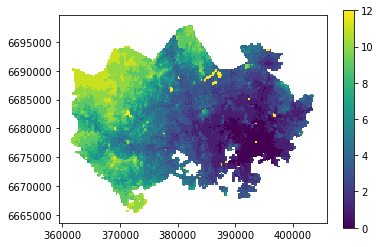

In [147]:

itis_geo.plot(column="car_r_t_cl", linewidth=0,legend=True)

# Use tight layout


In [90]:
itis_geo["pt_r_t_cl"].value_counts()

3     1684
4     1454
2     1338
5     1286
7     1261
8     1246
6     1213
1     1031
9      996
10     702
0      465
11     344
12     211
Name: pt_r_t_cl, dtype: int64